In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#Mean

In [5]:
# 01 Arithmetic mean
#Usage: Ideal for interval and ratio data, and when data is evenly 
#distributed without extreme outliers.

df['fare'].mean()   #Arithmetic mean

32.204207968574636

In [6]:
# 02 geometric mean
#Used for datasets that contain values with different ranges or 
#units, such as growth rates.

from scipy import stats
data = np.array([10, 20, 30, 40, 50])

stats.gmean(data) 


26.051710846973528

In [7]:
# 03 Harmonic Mean
#Suitable for rates and ratios, like speeds or productivity 
#measurements.

stats.hmean(data)

21.8978102189781

In [8]:
# 04 Truncated (or Trimmed) Mean
#Helpful in reducing the impact of outliers or extreme values.

stats.trim_mean(data, 0.05)     #5% trancate from both side..

30.0

In [9]:
## 05 Weighted Mean
#Used when certain values in a dataset are more significant 
#than others.
#Calculating a student’s grade point average (GPA), where each course 
#has a different credit weight.
#Consider exam scores: [80, 90, 70] with weights (percentage of total 
#grade): [50%, 25%, 25%] """

(0.5*80+0.25*90+0.25*70)/(0.5+0.25+0.25)

80.0

mean limitation:
sensitive to outliers - one outlier can completely change the mean.
data would get skewed to right/left.

so we have median which is not prone to outliers.
skewness reason >> outliers

#Median

Median-
the data set is sorted first and then the middle value is picked as median.

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df['age'].mean()

29.69911764705882

In [12]:
df['age'].median()

28.0

#mode

In [13]:
# mode of fare
df['class'].mode()

0    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [14]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [15]:
df['sibsp'].value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

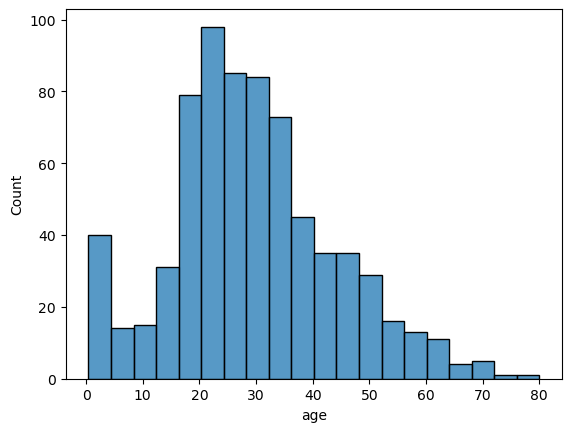

In [16]:
sns.histplot(df, x= 'age')

In [17]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


measures of dispersion - range - IQR - variance - standard deviation - standard error - coefficient of variation CV---  
to understand everything about your data, central tendency is not sufficient - there can be cases where means of diff datasets can be same then how will we differentiate datasets in that case? so we have measures of dispersion for that.

#range - flow- prone to outliers

In [18]:
# Lets find range of a data
df = np.array([10, 20, 30, 40, 50])
np.ptp(df)

40

#IQR - not prone to outliers


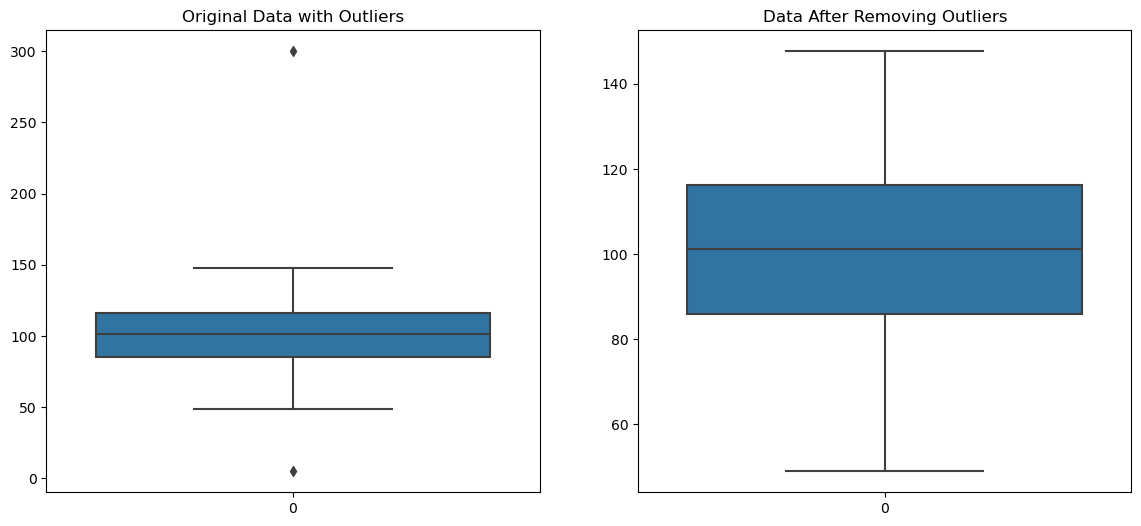

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a dataset with potential outliers
np.random.seed(0)
data = np.random.normal(100, 20, 200)
data = np.append(data, [300, 5])  # Adding potential outliers

# Calculating IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Defining the outlier criteria (1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Removing outliers
data_no_outliers = data[~outliers]

# Plotting the original data with outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data)
plt.title('Original Data with Outliers')

# Plotting the data after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers)
plt.title('Data After Removing Outliers')

plt.show()

#variance

flow- prone to outliers - 
diff unit then the feature prob.

In [20]:
# import library

import numpy as np

# create a dataset

df = np.array([2,3,4,5,6])
mean = np.mean(df)
var = np.var(df, ddof=1)
var

2.5

#Standard Deviation

flow -prone to outliers. 
if we have variance then whats the purpose of SD?? whatever will be the unit of the feature, SD will have the same unit while variance will have diff unit. SD solves this prob.

In [21]:
# import library
import numpy as np

df = np.array([2,3,4,5,6])

#calculate standard deviation
std = np.std(df, ddof=1)
std
print("Standard Deviation: ", std)
# calculate the standard error
se = std/np.sqrt(len(df))
print("Standard Error: ", se)

Standard Deviation:  1.5811388300841898
Standard Error:  0.7071067811865476
